## Notebook to test the `MyLinearRegression` class and its methods

In [1]:
from Class_MyLinearRegression import MyLinearRegression as mlr
import numpy as np
import matplotlib.pyplot as plt

### Generate random data with noise 

In [2]:
num_samples=100
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+2*np.random.randn(num_samples)

### Instantiate model and fit

In [3]:
model = mlr()
model.fit(X,y)

### Model metrics

In [4]:
print ("R-squared: ",model.r_squared())
print ("Adjusted R-squared: ",model.adj_r_squared())
print("MSE: ",model.mse())

R-squared:  0.9890652102512777
Adjusted R-squared:  0.9884835724986861
MSE:  4.447051771303101


### Fitted vs residuals plot

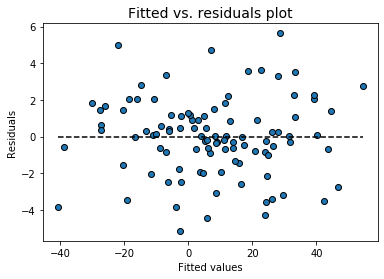

In [5]:
model.fitted_vs_residual()

### Fitted values vs. feature variables

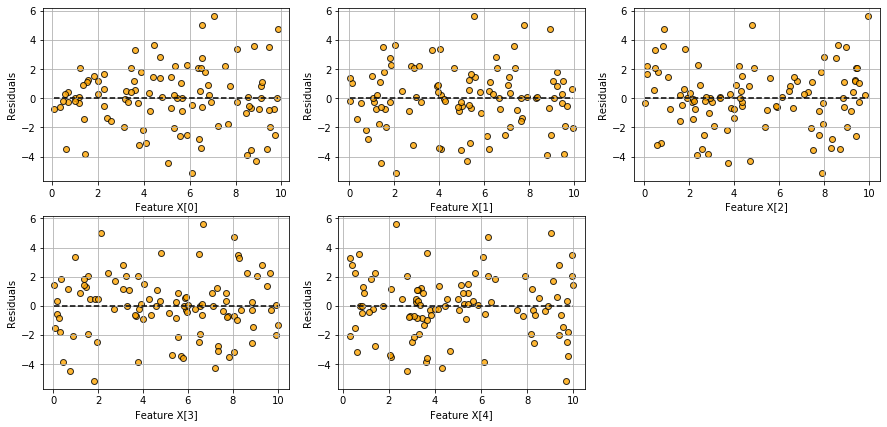

In [6]:
model.fitted_vs_features()

### Pairplot of the dataset

This may take a little time. Have patience...


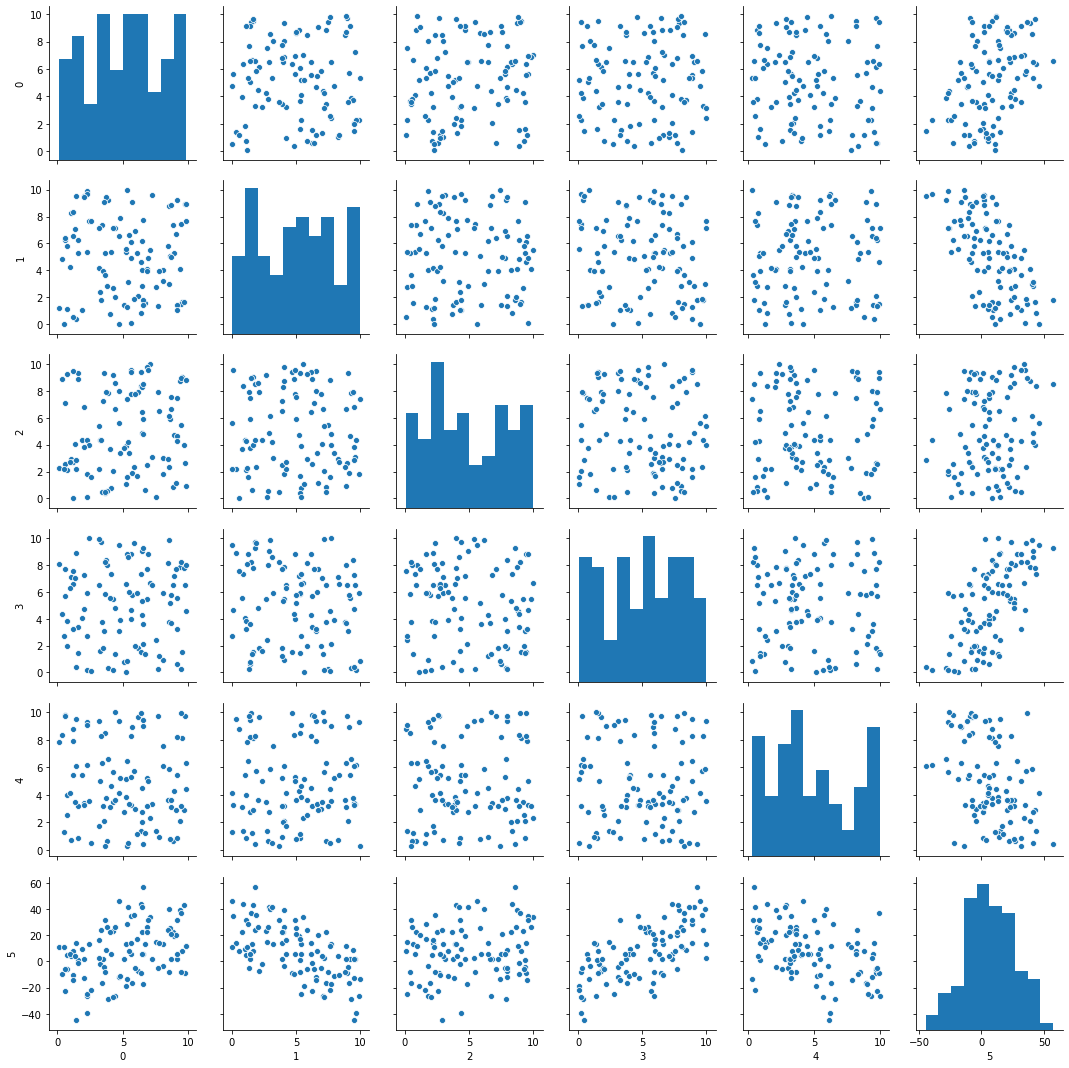

In [7]:
model.pairplot()

### Cook's distance plot

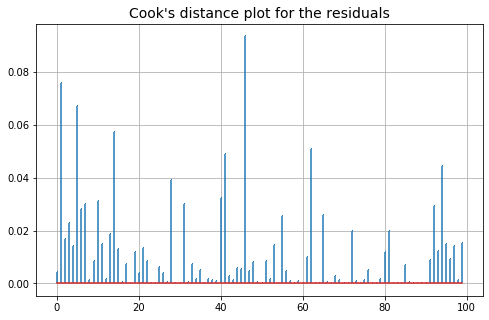

In [8]:
model.cook_distance()

### Influence plot

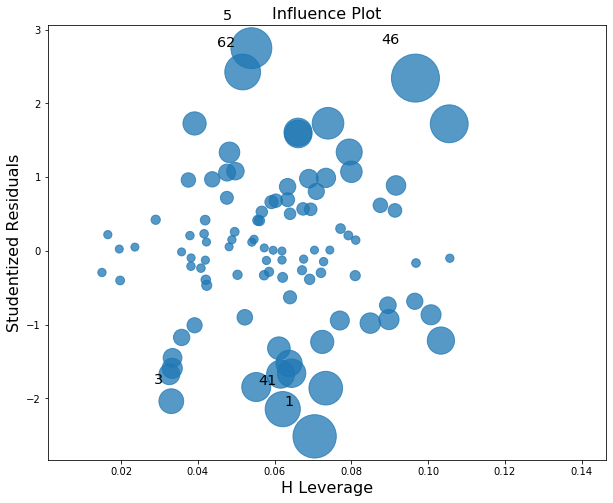

In [9]:
model.influence_plot()

### Variance inflation factors

In [10]:
model.vif()

Variance inflation factor for feature 0: 3.63
Variance inflation factor for feature 1: 3.04
Variance inflation factor for feature 2: 3.22
Variance inflation factor for feature 3: 3.03
Variance inflation factor for feature 4: 3.05


### Let's run all diagnostics tests

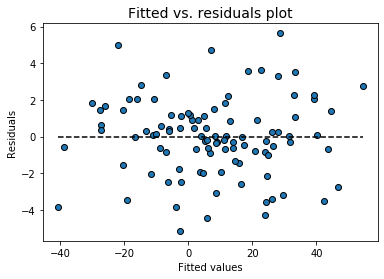

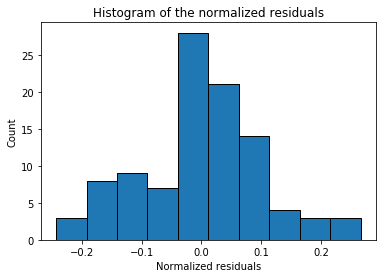

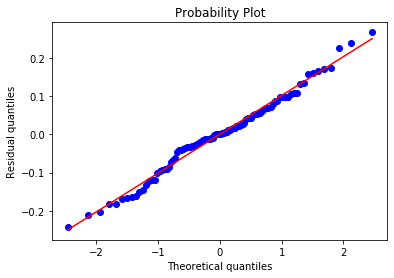


The residuals seem to have come from a Gaussian process


In [11]:
model.run_diagnostics()